In [ ]:
#part1: separación entre reciclable y orgánica
#https://www.kaggle.com/yannick09/waste-classification

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import numpy as np

#carga de datos y prprocesamiento

In [ ]:
#conexión a drive 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
#/content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive
#Check the present working directory using pwd command

/content/gdrive/My Drive


In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

 94% 401M/427M [00:08<00:00, 32.6MB/s]
100% 427M/427M [00:08<00:00, 55.0MB/s]


In [ ]:
#!kaggle datasets download -d asdasdasasdas/garbage-classification

 82% 67.0M/82.0M [00:00<00:00, 67.1MB/s]
100% 82.0M/82.0M [00:00<00:00, 105MB/s] 


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: DATASET/TRAIN/R/R_5499.jpg  
  inflating: DATASET/TRAIN/R/R_55.jpg  
  inflating: DATASET/TRAIN/R/R_550.jpg  
  inflating: DATASET/TRAIN/R/R_5500.jpg  
  inflating: DATASET/TRAIN/R/R_5501.jpg  
  inflating: DATASET/TRAIN/R/R_5502.jpg  
  inflating: DATASET/TRAIN/R/R_5503.jpg  
  inflating: DATASET/TRAIN/R/R_5504.jpg  
  inflating: DATASET/TRAIN/R/R_5505.jpg  
  inflating: DATASET/TRAIN/R/R_5506.jpg  
  inflating: DATASET/TRAIN/R/R_5507.jpg  
  inflating: DATASET/TRAIN/R/R_5508.jpg  
  inflating: DATASET/TRAIN/R/R_5509.jpg  
  inflating: DATASET/TRAIN/R/R_551.jpg  
  inflating: DATASET/TRAIN/R/R_5510.jpg  
  inflating: DATASET/TRAIN/R/R_5511.jpg  
  inflating: DATASET/TRAIN/R/R_5512.jpg  
  inflating: DATASET/TRAIN/R/R_5513.jpg  
  inflating: DATASET/TRAIN/R/R_5514.jpg  
  inflating: DATASET/TRAIN/R/R_5515.jpg  
  inflating: DATASET/TRAIN/R/R_5516.jpg  
  inflating: DATASET/TRAIN/R/R_5517.jpg  
  inflating: DATASE

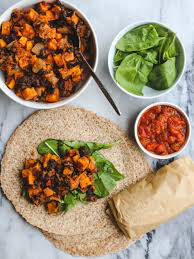

In [ ]:
Image.open('DATASET/TEST/O/O_13191.jpg')

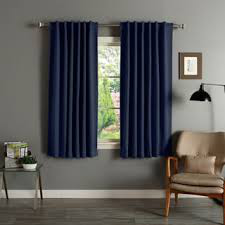

In [ ]:
Image.open('DATASET/TEST/R/R_10045.jpg')

In [ ]:
# preprocesamiento de imgs

datagen_tr = ImageDataGenerator( rescale = 1./255,validation_split=0.2)
datagen_ts = ImageDataGenerator( rescale = 1./255)

In [ ]:
data_tr = datagen_tr.flow_from_directory('DATASET/TRAIN', target_size = (128, 128), batch_size = 32, class_mode = 'binary',subset='training')

data_val = datagen_tr.flow_from_directory('DATASET/TRAIN', target_size = (128, 128), batch_size = 32, class_mode = 'binary',subset='validation')

data_train = datagen_ts.flow_from_directory('DATASET/TRAIN', target_size = (128, 128), batch_size = 32, shuffle=False, class_mode = "binary")

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [ ]:
#modelo 1: sacado del desafío de keras
from tensorflow.keras import regularizers


model = Sequential()
model.add(Conv2D(35, (3, 3), input_shape = (128,128, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(35, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 30,  kernel_regularizer=regularizers.l2(0.01), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 35)      980       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 35)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 35)        11060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 35)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                945030    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)               

In [ ]:
#train 1

history = model.fit_generator(data_tr, steps_per_epoch = 562, verbose=True,epochs = 32, validation_data = data_val, validation_steps = 140)

Epoch 1/32
562/562 [==============================] - 36s 65ms/step - loss: 0.5439 - accuracy: 0.7872 - val_loss: 0.4305 - val_accuracy: 0.8167
Epoch 2/32
562/562 [==============================] - 30s 53ms/step - loss: 0.4845 - accuracy: 0.8137 - val_loss: 0.6496 - val_accuracy: 0.8250
Epoch 3/32
562/562 [==============================] - 30s 53ms/step - loss: 0.4635 - accuracy: 0.8283 - val_loss: 0.3169 - val_accuracy: 0.7721
Epoch 4/32
562/562 [==============================] - 30s 53ms/step - loss: 0.4580 - accuracy: 0.8306 - val_loss: 0.4823 - val_accuracy: 0.8254
Epoch 5/32
562/562 [==============================] - 30s 53ms/step - loss: 0.4482 - accuracy: 0.8379 - val_loss: 0.6238 - val_accuracy: 0.8397
Epoch 6/32
562/562 [==============================] - 29s 52ms/step - loss: 0.4430 - accuracy: 0.8401 - val_loss: 0.4932 - val_accuracy: 0.8013
Epoch 7/32
562/562 [==============================] - 29s 52ms/step - loss: 0.4363 - accuracy: 0.8424 - val_loss: 0.5211 - val_accuracy:

Text(0.5, 1.0, 'Accuracy Curves')

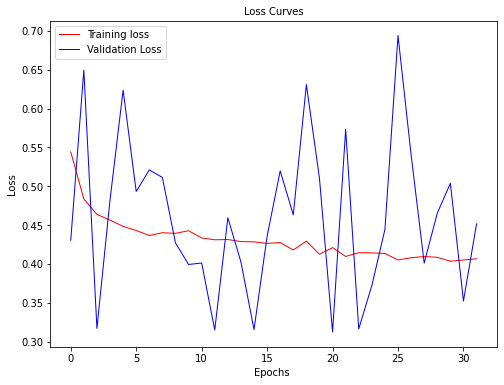

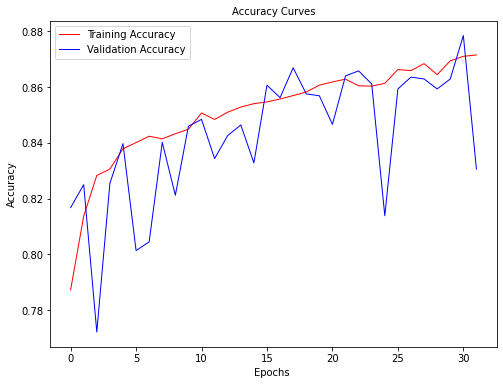

In [ ]:
#Gráfico de loss del modelo 1 (comparación de conjunto de validación con el de entrenamiento)
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)


#Gráfico de accuracy del modelo 1 (comparación de conjunto de validación con el de entrenamiento)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=1.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curves',fontsize=10)


Acc score:  0.8639076800636689


Text(0.5, 15.0, 'Predicted label')

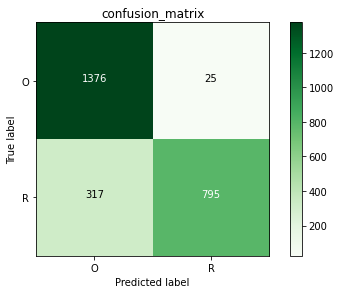

In [ ]:
 from sklearn.metrics import accuracy_score
Y_pred = model.predict_generator(data_ts)
y_pred =np.around(Y_pred, decimals=0)

print("Acc score: ",accuracy_score(data_ts.classes,y_pred))


from sklearn.metrics import confusion_matrix
import itertools

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['O','R'])
plt.yticks(tick_marks, ['O','R'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
base_model =InceptionV3(weights = 'imagenet', include_top = False)

87916544/87910968 [==============================] - 4s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(30, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
import tensorflow
print(tensorflow.keras.__version__)

2.3.0-tf


In [ ]:
from keras.models import Model

model2 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model2.fit_generator(data_tr, steps_per_epoch = 560, verbose=True,epochs = 5, validation_data = data_val, validation_steps = 140)

Epoch 1/5
560/560 [==============================] - 37s 66ms/step - loss: 0.4436 - accuracy: 0.7987 - val_loss: 0.7916 - val_accuracy: 0.8674
Epoch 2/5
560/560 [==============================] - 32s 58ms/step - loss: 0.3884 - accuracy: 0.8263 - val_loss: 0.2225 - val_accuracy: 0.8504
Epoch 3/5
560/560 [==============================] - 33s 59ms/step - loss: 0.3684 - accuracy: 0.8409 - val_loss: 0.5999 - val_accuracy: 0.8813
Epoch 4/5
560/560 [==============================] - 32s 58ms/step - loss: 0.3590 - accuracy: 0.8403 - val_loss: 0.7191 - val_accuracy: 0.8882
Epoch 5/5
560/560 [==============================] - 32s 57ms/step - loss: 0.3448 - accuracy: 0.8513 - val_loss: 0.1528 - val_accuracy: 0.8569


In [ ]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model2.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

In [ ]:
from keras.optimizers import SGD
model2.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss ='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model2.fit_generator(data_tr, steps_per_epoch = 560, verbose=True,epochs = 27, validation_data = data_val, validation_steps = 140)

Epoch 1/27
560/560 [==============================] - 36s 64ms/step - loss: 0.3019 - accuracy: 0.8745 - val_loss: 0.4357 - val_accuracy: 0.8810
Epoch 2/27
560/560 [==============================] - 32s 57ms/step - loss: 0.3234 - accuracy: 0.8639 - val_loss: 0.0893 - val_accuracy: 0.8826
Epoch 3/27
560/560 [==============================] - 32s 57ms/step - loss: 0.3234 - accuracy: 0.8584 - val_loss: 0.5333 - val_accuracy: 0.8824
Epoch 4/27
560/560 [==============================] - 32s 58ms/step - loss: 0.3267 - accuracy: 0.8580 - val_loss: 0.3367 - val_accuracy: 0.8819
Epoch 5/27
560/560 [==============================] - 32s 57ms/step - loss: 0.3242 - accuracy: 0.8592 - val_loss: 0.6355 - val_accuracy: 0.8842
Epoch 6/27
560/560 [==============================] - 32s 57ms/step - loss: 0.3203 - accuracy: 0.8629 - val_loss: 0.4055 - val_accuracy: 0.8835
Epoch 7/27
560/560 [==============================] - 32s 57ms/step - loss: 0.3183 - accuracy: 0.8610 - val_loss: 0.6643 - val_accuracy:

Text(0.5, 1.0, 'Accuracy Curves')

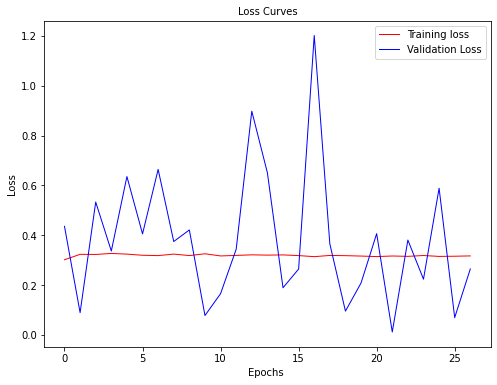

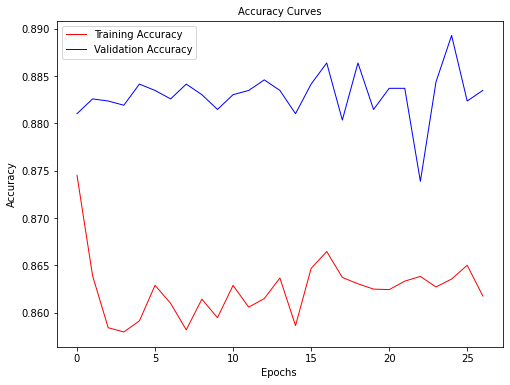

In [ ]:
#Gráfico de loss del modelo 1 (comparación de conjunto de validación con el de entrenamiento)
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)


#Gráfico de accuracy del modelo 1 (comparación de conjunto de validación con el de entrenamiento)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=1.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curves',fontsize=10)


Acc score:  0.8575407879029049


Text(0.5, 15.0, 'Predicted label')

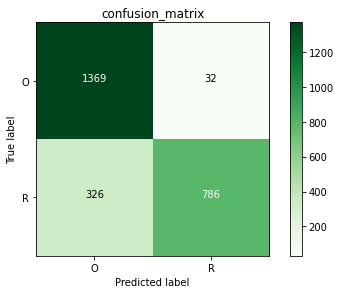

In [ ]:
Y_pred = model2.predict_generator(data_ts)
y_pred =np.around(Y_pred, decimals=0)

print("Acc score: ",accuracy_score(data_ts.classes,y_pred))

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['O','R'])
plt.yticks(tick_marks, ['O','R'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#guardar modelo de todas formas

# serialize model to JSON
model_json = model.to_json()
with open("InceptionV3_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("InceptionV3_2.hdf5")
print("Saved model to disk")

#model2.save("InceptionV3_2.h5")

Saved model to disk


In [ ]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("From_scratch_V1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("From_scratchV1.hdf5")
print("Saved model to disk")

#model.save("From_scratchV1.h5")

Saved model to disk


In [ ]:
from tensorflow.keras.models import load_model

#load models
model_for_waste_rec= load_model('InceptionV3_2.json')

OSError: ignored

Acc score:  0.8670911261440509


Text(0.5, 15.0, 'Predicted label')

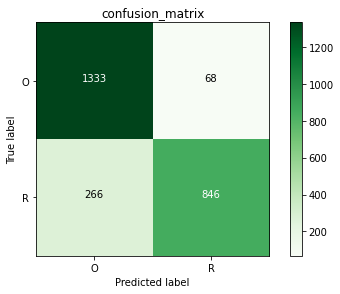

In [ ]:
Y_pred = model3.predict(data_ts)
y_pred =np.around(Y_pred, decimals=0)

print("Acc score: ",accuracy_score(data_ts.classes,y_pred))

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['O','R'])
plt.yticks(tick_marks, ['O','R'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import base64
import numpy as np
import io
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from keras.models import load_model, model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from flask import request
from flask import jsonify
from flask import Flask
import cv2
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Model




def load_json(model_json, model_weight):
    json_file = open(model_json, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(model_weight)

    return loaded_model

def load_models(model_trashnet, model_trashnet_weight):
    

    model_for_trashnet = load_json(model_trashnet, model_trashnet_weight)

    return model_for_trashnet


model_waste_rec = "From_scratch_V1.json"
model_waste_rec_weight = 'From_scratchV1.hdf5'




#load models
model_for_waste_rec = load_models( model_waste_rec,model_waste_rec_weight)

print('model loaded')


model loaded


In [ ]:
 from sklearn.metrics import accuracy_score
Y_pred = model_for_waste_rec.predict(data_train)
y_pred =np.around(Y_pred, decimals=0)

print("Acc score waste recognition (train): ",accuracy_score(data_train.classes,y_pred))

Acc score waste recognition (train):  0.8612834603793653


Text(0.5, 15.0, 'Predicted label')

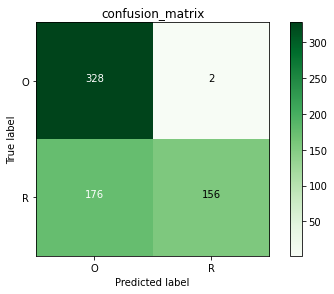

In [ ]:
Y_pred = model_for_waste_rec.predict(data_ts)
y_pred =np.around(Y_pred, decimals=0)


from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['O','R'])
plt.yticks(tick_marks, ['O','R'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')